In [1]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split


X, y = fetch_openml('Fashion-MNIST', version=1, return_X_y=True)
X /= 255.0

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linearization
x_train = np.array(X_train).reshape(X_train.shape[0], -1)
x_test = np.array(X_test).reshape(X_test.shape[0], -1)

x_train.shape, x_train.dtype, x_test.shape, x_test.dtype

((56000, 784), dtype('float64'), (14000, 784), dtype('float64'))

In [2]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
x_train = scaler.fit_transform(X_train)
x_test = scaler.transform(X_test)

In [3]:
from sklearn.cluster import KMeans


k_means_preds = KMeans(n_clusters=10, random_state=0).fit(x_train).predict(x_test)

In [4]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score


ari = adjusted_rand_score(y_test, k_means_preds)          # Adjusted Rand Index
nmi = normalized_mutual_info_score(y_test, k_means_preds) # Normalized Mutual Information

print(f"Adjusted Rand Index (ARI): {ari}")
print(f"Normalized Mutual Information (NMI): {nmi}")

Adjusted Rand Index (ARI): 0.35051049641645204
Normalized Mutual Information (NMI): 0.5182052681852325


In [5]:
from sklearn.cluster import BisectingKMeans


preds = BisectingKMeans(n_clusters=10, init='k-means++', random_state=0, 
                              bisecting_strategy='largest_cluster').fit(x_train).predict(x_test)

In [6]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score


ari = adjusted_rand_score(y_test, preds)          # Adjusted Rand Index
nmi = normalized_mutual_info_score(y_test, preds) # Normalized Mutual Information

print(f"Adjusted Rand Index (ARI): {ari}")
print(f"Normalized Mutual Information (NMI): {nmi}")

Adjusted Rand Index (ARI): 0.2811938108603197
Normalized Mutual Information (NMI): 0.4458634618973361


In [7]:
from sklearn.cluster import DBSCAN


preds = DBSCAN(eps=5, min_samples=10, n_jobs=-1).fit_predict(x_train)

In [8]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score


ari = adjusted_rand_score(y_train, preds)          # Adjusted Rand Index
nmi = normalized_mutual_info_score(y_train, preds) # Normalized Mutual Information

print(f"Adjusted Rand Index (ARI): {ari}")
print(f"Normalized Mutual Information (NMI): {nmi}")

Adjusted Rand Index (ARI): 0.0
Normalized Mutual Information (NMI): 0.0


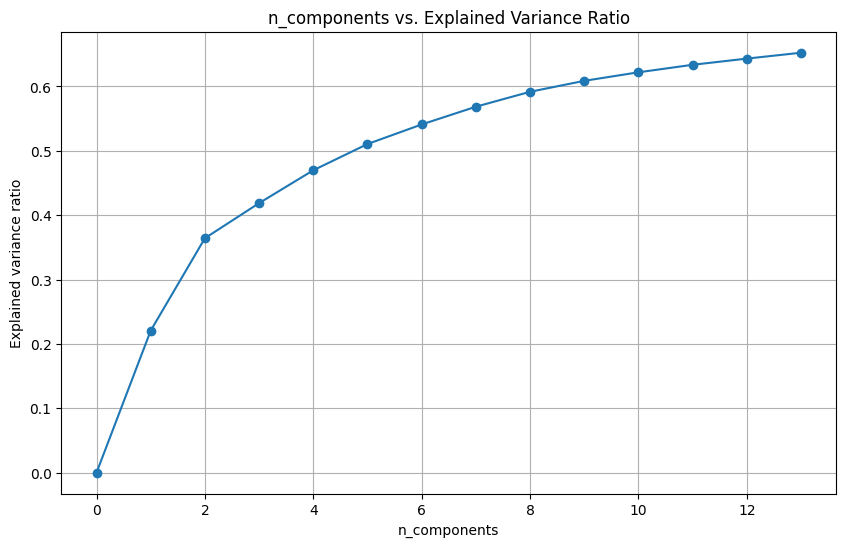

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


nums = np.arange(14)
var_ratio = []

for num in nums:
  pca = PCA(n_components=num)
  pca.fit_transform(x_train)
  pca.transform(x_test)
  var_ratio.append(np.sum(pca.explained_variance_ratio_))

plt.figure(figsize=(10, 6))
plt.title('n_components vs. Explained Variance Ratio')
plt.xlabel('n_components')
plt.ylabel('Explained variance ratio')
plt.plot(nums,var_ratio,marker='o')
plt.grid()
plt.show()

In [10]:
pca = PCA(n_components=9)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)


k_means_preds = KMeans(n_clusters=10, random_state=0).fit(x_train_pca).predict(x_test_pca)

In [11]:
class_names = [
    'T-shirt',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]

class_names[int(y_train[0])]

'Ankle boot'

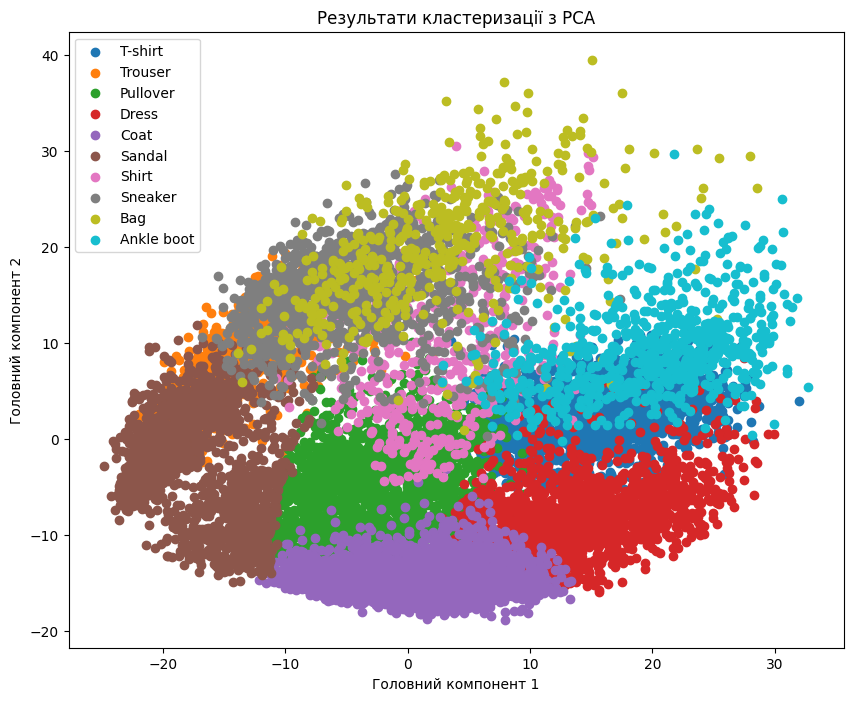

In [12]:
plt.figure(figsize=(10, 8))

for i in range(10):
    plt.scatter(x_test_pca[k_means_preds == i, 0], x_test_pca[k_means_preds == i, 1], label=class_names[i])

plt.title('Результати кластеризації з PCA')
plt.xlabel('Головний компонент 1')
plt.ylabel('Головний компонент 2')
plt.legend()
plt.show()